In [16]:
import ee
ee.Authenticate()
ee.Initialize()

In [18]:
import folium
import numpy as np

roi_center = [-70, -33.8719]
roi = ee.Geometry.Point(roi_center)

# Load Landsat 8 image collection, filter by date and region
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA").filterDate('2024-01-24', '2024-02-24')#.filterBounds(roi)

bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
image_all_bands = landsat.median().select(bands)

vis_params = {
    'min': 0,
    'max': 0.3,
    'bands': ['B1'],
}

# Create a folium map centered at the region of interest
# (es necesario el np.flip, las coordenadas estan invertidas en relacion al otro)
m = folium.Map(location=np.flip(roi_center), zoom_start=7)

# Add the image layer to the map
map_id_dict = ee.Image(image_all_bands).getMapId(vis_params)
folium.TileLayer(
    tiles=map_id_dict['tile_fetcher'].url_format,
    attr='Google Earth Engine',
    name='Landsat 8 True Color',
    overlay=True,
    control=True
).add_to(m)

print(map_id_dict['tile_fetcher'].url_format)

# Add layer control
m.add_child(folium.LayerControl())

# Display the map
m


https://earthengine.googleapis.com/v1/projects/465119630439/maps/3c4e883aae18a04b22097b249a57cb5c-fa0b54aa91d55c73e9f27b1a1aa32fb5/tiles/{z}/{x}/{y}


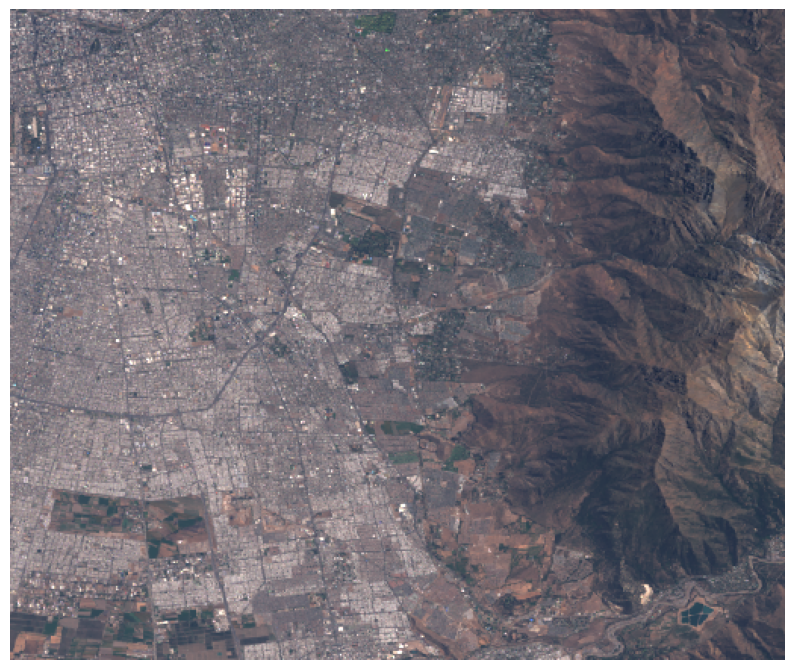

In [34]:
from PIL import Image
import requests

roi = ee.Geometry.Point([-70.56, -33.52])
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA").filterDate('2024-01-24', '2024-03-24').filterBounds(roi)
image = landsat.median().select(['B4', 'B3', 'B2'])

region = roi.buffer(10000).bounds().getInfo()

url = image.getThumbUrl({
    'region': region['coordinates'],
    'dimensions': 512,
    'format': 'png',
    'min': 0,
    'max': 0.3,
    'format': 'png'
})

img = Image.open(requests.get(url, stream=True).raw)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()